<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science. Нетология. Лекция 3.

# Собственный вектор. Собственное значение

Пример подсчета собственного вектора и собственных чисел программно

In [0]:
from numpy import linalg as LA
import numpy as np

A = np.array(
 [[5, 7, 3, 0, 6],
 [0, 6, 3, 9, 8],
 [3, 0, 9, 7, 6],
 [7, 6, 4, 5, 0],
 [7, 8, 6, 0, 9]]
)

e_vals, e_vecs = LA.eig(A)
print('Исходная матрица: \n', A)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[5 7 3 0 6]
 [0 6 3 9 8]
 [3 0 9 7 6]
 [7 6 4 5 0]
 [7 8 6 0 9]]
Собственные вектора: 
 [[-0.3911662   0.37587179 -0.57232236 -0.45355646  0.08811846]
 [-0.46746001 -0.55458423  0.45352364  0.003845   -0.54074915]
 [-0.43308298 -0.51011889  0.56376799  0.7891994   0.44026451]
 [-0.35922382  0.34920094 -0.19384401  0.09479593 -0.5641288 ]
 [-0.558451    0.41108898 -0.33369683 -0.40305061  0.43330284]]
Собственные значения:  [ 2.52527085e+01 -2.83754596e+00 -3.80333720e-03  5.05245324e+00
  6.53618755e+00]


# Решение системы линейных уравнений с помощью numpy

Дана система линейных уравнений:
$$\left\{\begin{matrix}
3x_0+x_1=9\\ 
x_0+2x_1=8
\end{matrix}\right.$$

Запишем данную систему ввиде массива a, b, x и решим с помощью библиотеки numpy:

In [0]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
x


array([2., 3.])

Проверим правильность решения уравнения:

In [0]:
np.allclose(np.dot(a, x), b)

True

# Пример решения системы линейных уравнений.

### Нахождение уравнения плоскости по точкам, через которые она проходит.
Уравнение плоскости в 3-х мерном пространстве задаётся уравнением:
\begin{matrix}
z = ax + by + c & (1)
\end{matrix}
Уравнение плоскости однозначно задаётся 3 точками через которые она проходит.

Таким образом легко понять, что если мы знаем координаты точек, через которые проходит плоскость, то в уравнении (1) у вас 3 переменных: a, b, c. А значения x, y, z нам известны для 3 точек.

Если плоскость проходит через точки (1;-6;1), (0;-3;2) и (-3;0;-1), то мы легко можем найти коэффициенты, подставив значения соответсвующих координат для всех 3 точек в уравнение (1) и получив систему из 3 уравнений.

Для точки x = 1, y = -6, z = 1:
\begin{matrix}
a\cdot 1 + b\cdot (-6) + c = 1 & (2)
\end{matrix}

Для точки x = 0, y = -3, z = 2:
\begin{matrix}
a\cdot 0 + b\cdot (-3) + c = 2 &(3)
\end{matrix}

Для точки x = -3, y = 0, z = -1:
\begin{matrix}
a\cdot (-3) + b\cdot 0 + c = -1 &(4)
\end{matrix}

На основании системы уравнений (2), (3), (4) можно записать матрицу коэффициентов перед неизвестными (левая часть матрицы):

\begin{pmatrix}
1& -6 & 1
\\ 
0 & -3 & 1
\\ 
-3 & 0 & 1
\end{pmatrix}

И вектор свободных членов (правая часть):
\begin{pmatrix}
1
\\ 
2
\\
-1
\end{pmatrix}

In [22]:
import numpy # импортируем библиотеку 

M5 = numpy.array([[1., -6., 1.], [0., -3., 1], [-3, 0, 1]]) # Матрица (левая часть системы)
v5 = numpy.array([1., 2., -1.]) # Вектор (правая часть системы)

numpy.linalg.solve(M5, v5)


array([2., 1., 5.])

**Ответ: уравнение искомой плоскости в пространстве задаётся уравнением $z = 2x + y + 5$**

### Нахождение уравнения параболы по 2 точкам и касательной

Найти уравнение параболы ($f(x) = ax^2 + bx + x & (5)$), проходящей через точки (1,1) и (-1,1) и касающейся биссектрисы 1й координатной четверти.

Как и в предыдущем примере неизвестными для нас являются коэффициенты a, b, c.

Подставив в уравнение параболы (5) значения аргумента (x) и функции (f(x)) получим 2 уравнения:

\begin{matrix}
a\cdot 1^2 + b\cdot 1 + c = 1 &(6)
\\
a\cdot (-1)^2 + b\cdot (-1) + c = 1 &(7)
\end{matrix}

Однако для нахождения 3 неизвестных 2 уравнений мало. Необходимо найти ещё одно из оставшихся условий.

Касание биссектрисы 1й координатной четверти означает, что наша парабола имеет касательную $y = x$. Если посмотреть на условие задачи, то мы увидим, что одна из точек (1, 1) лежит на этой прямой. Это означает, что мы знаем точку касания.

Уравнение прямой, делящей 1-ю координатную четверть пополам (биссектрисы) имеет вид $y = kx \quad (8)$

При этом мы знаем, что угол уравнения касательной (коэффициент k уравнения 8) равен производной от функции (5) в точке касания.

\begin{matrix}
f'(x) = 2ax + bx & (9)
\end{matrix}

Подставив значение аргумента (x = 1) в точке касания и коэффициента (k = 1 в качестве производной f'(x)) 

\begin{matrix}
1 = 2a\cdot1 + b\cdot1 & (10)
\end{matrix}

Используя уравнения (6), (7) и (10), запишем полную систему уравнений, которую нам необходимо решить:

\begin{matrix}
a\cdot 1 + b\cdot 1 + c \cdot 1 = 1 &(11)
\\
a\cdot 1 + b\cdot (-1) + c \cdot 1 = 1 &(12)
\\
a\cdot 2 + b\cdot 1 + c \cdot 0 = 1 &(13)
\end{matrix}

По привычной уже схеме запишем коэффициенты перед переменными (левую часть системы) в матрицу, а свободные члены (правую часть) в вектор:

\begin{pmatrix}
1& 1 & 1
\\ 
1 & -1 & 1
\\ 
2 & 1 & 0
\end{pmatrix}

\begin{pmatrix}
1
\\ 
1
\\ 
1
\end{pmatrix}

In [23]:
import numpy # импортируем библиотеку 

M6 = numpy.array([[1., 1., 1.], [1., -1., 1], [2, 1, 0]]) # Матрица (левая часть системы)
v6 = numpy.array([1., 1., 1.]) # Вектор (правая часть системы)

numpy.linalg.solve(M6, v6)

array([ 0.5, -0. ,  0.5])

**Ответ: уравнение искомой параболы задаётся функцией $f(x) = 0.5x^2 + 0.5$**

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


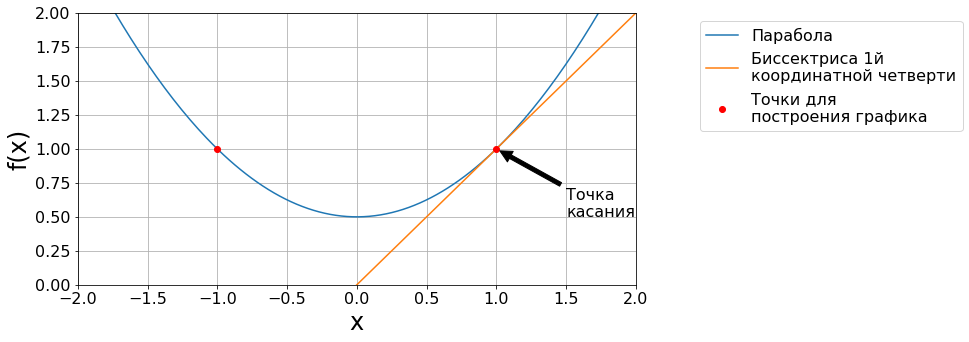

In [24]:
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

mpl.rc('font', family='Verdana', size= 16)

w = numpy.linalg.solve(M6, v6) # запишем найденные коэффициенты в переменную
def f(x):
    return w[0]*x**2 + w[1]*x + w[2] # уравнение параболы


fig, ax = plt.subplots(figsize=(10,5))

x = numpy.linspace(-2,2,200)
ax.axis([-2., 2., 0., 2.])
ax.grid()
ax.plot(x, f(x), label = 'Парабола')
ax.plot(x, x, label = 'Биссектриса 1й\nкоординатной четверти')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 24})
ax.set_ylabel(u'f(x)',{'fontname':'Arial', 'size': 24})
plt.plot([-1, 1], [1, 1], 'ro', label = 'Точки для\nпостроения графика')
ax.annotate('Точка\nкасания', xy=(1., 1.), xytext=(1.5, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.legend(bbox_to_anchor=(1.6, 1.))

plt.show()